# Exercise 3 - Anderson model on RRG

In [1]:
import numpy as np
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt

import disordered_sys.anderson

In [2]:
%matplotlib notebook
# make experiments reproducible
rng = np.random.default_rng(seed=42)

/home/hm/sose2022/Advanced_Computational_Physics_Lab./proj2_disordered_systems/code/disordered_sys/anderson.py:21: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_matrix = nx.adjacency_matrix(conn_graph)


<IPython.core.display.Javascript object>


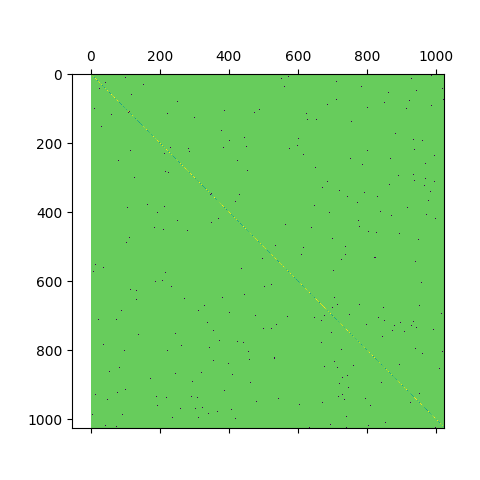

In [3]:
g = disordered_sys.anderson.graph(conn=3, size=2**10, seed=rng)
h = disordered_sys.anderson.hamiltonian(g, w=.3)

plt.matshow(h)
plt.show()

# Spectrum from direct diagonalization

In [4]:
vals = np.linalg.eigvalsh(h)
plt.hist(vals, stacked=True, density=True, bins=100)
plt.show()

# Spectrum from population method

In [5]:
n_p = 1000
c = 3
epsilon = 1e-3
w = .3
eigenval = 0

make initial distribution of precisions $\omega$

<IPython.core.display.Javascript object>


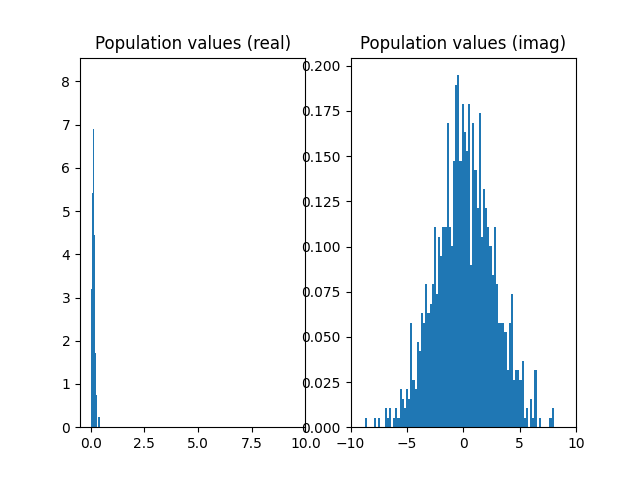

In [6]:
random_realpart = rng.rayleigh(scale=0.1, size=n_p)
random_imagpart = rng.normal(loc=0, scale=2.5, size=n_p)
pop = random_realpart + 1j * random_imagpart

_, (ax1, ax2) = plt.subplots(ncols=2)
ax1.set_xlim(-0.5, 10)
ax1.set_title("Population values (real)")
ax2.set_xlim(-10, 10)
ax2.set_title("Population values (imag)")
ax1.hist(pop.real, bins=int(n_p / 10), stacked=True, density=True)
ax2.hist(pop.imag, bins=int(n_p / 10), stacked=True, density=True)
plt.show()

In [7]:
# one step
population_idxs = rng.integers(low=0, high=n_p - 1, size=c - 1)
energy_sample = rng.uniform(low=-w, high=w)
change_idx = rng.integers(low=0, high=n_p - 1)

def cavity_equation(l, w, epsilon, precisions):
    e = rng.uniform(low=-w/2, high=w/2)
    return 1j * (l - 1j * epsilon - e) + np.sum(1 / precisions)

sample_values = pop.take(population_idxs[:-1])
pop[change_idx] = cavity_equation(
    eigenval, energy_sample, epsilon, sample_values
)

<IPython.core.display.Javascript object>


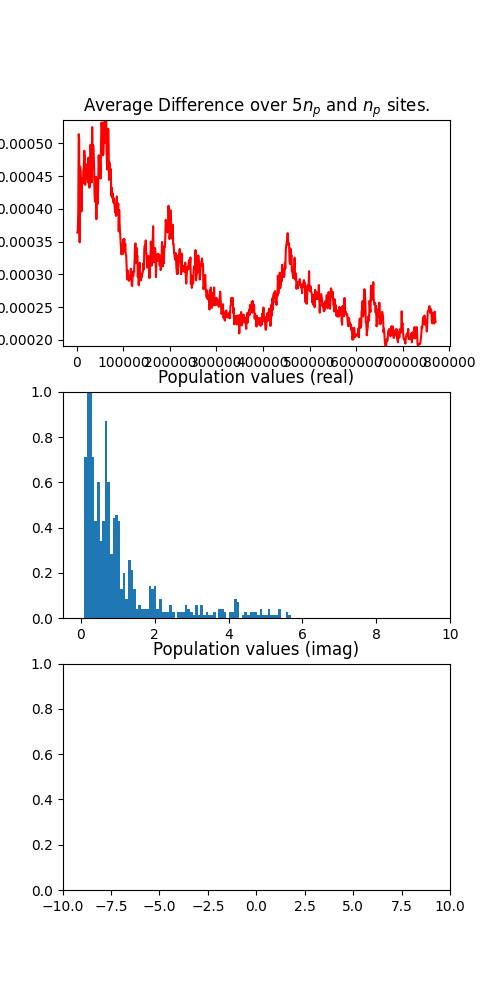

  0%|          | 0/999999 [00:00<?, ?it/s]

/tmp/ipykernel_53643/3004971379.py:27: UserWarning: Attempting to set identical bottom == top == 0.0003638015057766608 results in singular transformations; automatically expanding.
  ax1.set_ylim(min(diffs), max(diffs), emit=True)


KeyboardInterrupt: 

In [8]:
# initialize
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(5, 10))
ax1.plot([1], [1], "r-")
ax1.set_title("Average Difference over $5n_p$ and $n_p$ sites.")

diffs = []
steps = []

max_steps = 1_000_000
old_pop = pop.copy()
for step in tqdm(range(1, max_steps)):
    population_idxs = rng.integers(low=0, high=n_p, size=c - 1)
    energy_sample = rng.uniform(low=-w, high=w)
    change_idx = rng.integers(low=0, high=n_p)
    sample_values = pop.take(population_idxs[:-1])
    pop[change_idx] = cavity_equation(eigenval, w, epsilon, sample_values)

    if step % n_p * 5 == 0 and step != 0:
        diff = np.sum(np.abs(pop - old_pop)) / n_p / 5 / n_p
        old_pop = pop.copy()

        diffs.append(diff)
        steps.append(step)

        ax1.lines[0].set_ydata(diffs)
        ax1.lines[0].set_xdata(steps)
        ax1.set_ylim(min(diffs), max(diffs), emit=True)
        ax1.set_xlim(0 - step / 25, step * 1.04, emit=True)

        ax2.clear()
        ax3.clear()
        ax2.set_xlim(-0.5, 10)
        ax2.set_title("Population values (real)")
        ax3.set_xlim(-10, 10)
        ax3.set_title("Population values (imag)")
        ax2.hist(pop.real, bins=int(n_p / 10), stacked=True, density=True)
        ax3.hist(pop.imag, bins=int(n_p / 10), stacked=True, density=True)

        fig.canvas.draw()
        fig.canvas.flush_events()

_, (ax1, ax2) = plt.subplots(ncols=2)
ax1.hist(pop.real, bins=100, stacked=True, density=True)
ax1.set_title("Real values")
ax2.hist(pop.imag, bins=100, stacked=True, density=True)
ax2.set_title("Complex values")
plt.show()

Calculate marginals using population method

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(5, 10))
ax1.plot([1], [1], "r-")
ax1.set_title("Average Difference over $5n_p$ and $n_p$ sites.")

marginal_pop = pop.copy()

diffs = []
steps = []
max_steps = 1_000_000
old_pop = marginal_pop.copy()
for step in tqdm(range(1, max_steps)):
    population_idxs = rng.integers(low=0, high=n_p, size=c)
    energy_sample = rng.uniform(low=-w, high=w)
    change_idx = rng.integers(low=0, high=n_p)
    sample_values = marginal_pop.take(population_idxs[:-1])
    marginal_pop[change_idx] = cavity_equation(
        eigenval, w, epsilon, sample_values
    )

    if step % n_p * 5 == 0 and steps != 0:
        diff = np.sum(np.abs(marginal_pop - old_pop)) / n_p / 5 / n_p
        old_pop = marginal_pop.copy()

        diffs.append(diff)
        steps.append(step)

        ax1.lines[0].set_ydata(diffs)
        ax1.lines[0].set_xdata(steps)
        ax1.set_ylim(min(diffs), max(diffs), emit=True)
        ax1.set_xlim(0 - step / 25, step * 1.04, emit=True)

        ax2.clear()
        ax3.clear()
        ax2.set_xlim(-0.5, 10)
        ax2.set_title("Population values (real)")
        ax3.set_xlim(-10, 10)
        ax3.set_title("Population values (imag)")
        ax2.hist(
            marginal_pop.real, bins=int(n_p / 10), stacked=True, density=True
        )
        ax3.hist(
            marginal_pop.imag, bins=int(n_p / 10), stacked=True, density=True
        )

        fig.canvas.draw()
        fig.canvas.flush_events()

Calculate the spectral density for the chosen $\lambda = 1$

In [ ]:
G_ii = 1j / marginal_pop
rho_lambda = np.sum(G_ii.imag) / np.pi / len(G_ii)
print(rho_lambda)

In [ ]:
np.savez("initial_ev0.npz", eigv0=pop)